# Multiclass Classification 

Multiclass classification is a kind of supervised learning task in machine learning that involves classifying instances into one of three or more distinct classes or categories of the target feature. For multiclass classification, the minimum number of classes of the target feature should be three. In Binary classification tasks, our goal is to classify instances into one of two classes (like fraud detected or no fraud). Still, multiclass classification is used for problems where multiple possible outcomes are there. Multiclass classification can be used in various fields of Natural Language Processing tasks like Sentiment analysis(positive, negative, or neutral), text categorization language identification, etc. Also in speech recognition and recommendation systems(like recommending products, movies, or any content to users based on their preferences and behavior) multiclass classification is used.

# What is CatBoost

**CatBoost** or Categorical Boosting is a machine learning algorithm developed by Yandex, a Russian multinational IT company. This special boosting algorithm is based on the gradient boosting framework and is designed to handle categorical features more effectively than traditional gradient boosting algorithms. CatBoost incorporates techniques like ordered boosting, oblivious trees, and advanced handling of categorical variables to achieve high performance with minimal hyperparameter tuning. CatBoost classifier is an implementation of the CatBoost algorithm which is specifically used for classification task. CatBoost is very efficient for multiclass classification problems. Next we will see a step-by-step guide for implementation of CatBoost classifier for Multiclass classification using Iris dataset. Then a detailed Exploratory Data Analysis is given for understanding dataset. After that, we will develop a user interface where this model will run in background and users can give input and get real-time predicted results.

# Implementation of Multiclass classification using CatBoost

## Installation

CatBoost module doesn't come by default. We need to download it manually to our Python runtime environment.

In [10]:
!pip install catboost


## Importing required libraries

Now, we will import all necessary Python libraries required for this implementation like Pandas, NumPy, SKlearn, joblib, Seaborn and Matplotlib etc.

In [14]:
#importing Libraries 
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns


## Loading dataset and data pre-processing

In [17]:
# Load the Iris dataset
iris_df = load_iris()
X = iris_df.data
y = iris_df.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The Iris dataset is loaded, divided into training and testing sets using an 80/20 split, and the feature data is stored in X and the associated target labels are stored in Y. For reproducibility, the random seed is set to 42 and the dataset is taken from the load_iris function.

## Exploratory Data Analysis

Before model training it is required to understand the dataset in certain ways.

**Feature Distributions**

We will first visualize the distributions of individual features present in Iris dataset which are sepal length, sepal width, petal length, petal width. This will help us to understand their characteristics and potential outliers.

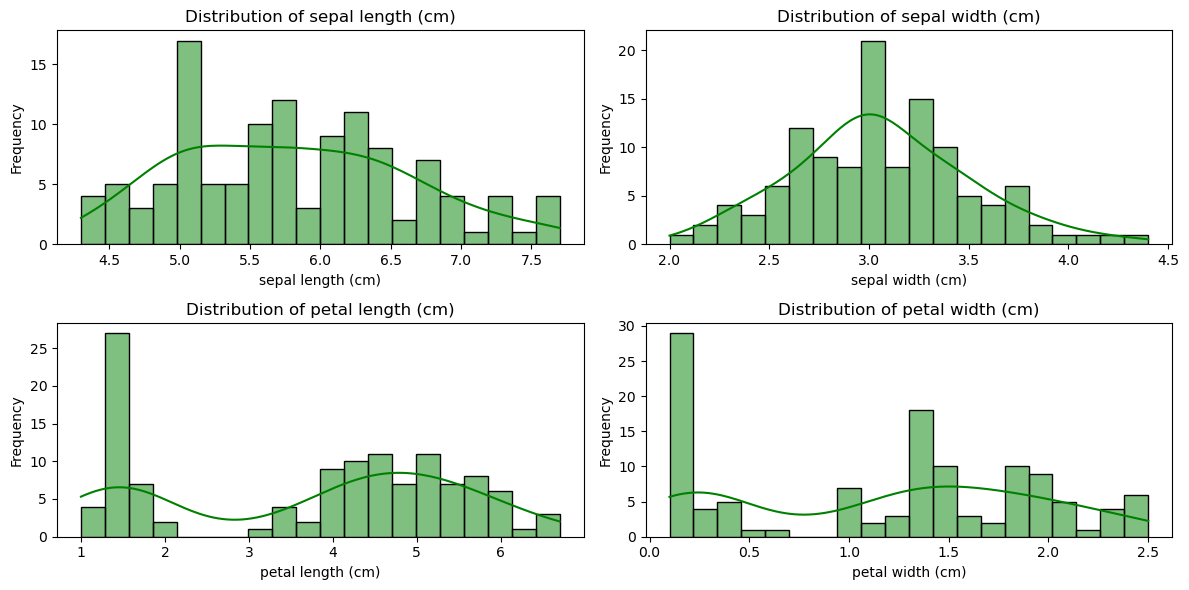

In [23]:
# Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris_df.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X_train[:, i], bins=20, kde=True, color='Green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


This method generates a 2x2 grid of subplots for each of the four features in the Iris dataset, each of which shows a histogram and a KDE plot. It offers a visual depiction of the distribution of each feature, making it easier to comprehend their properties and potential variations.

**Distribution of target classes**

Now we will see the distribution of target class. It will help to understand the class distribution which is essential for assessing class balance and potential data biases.

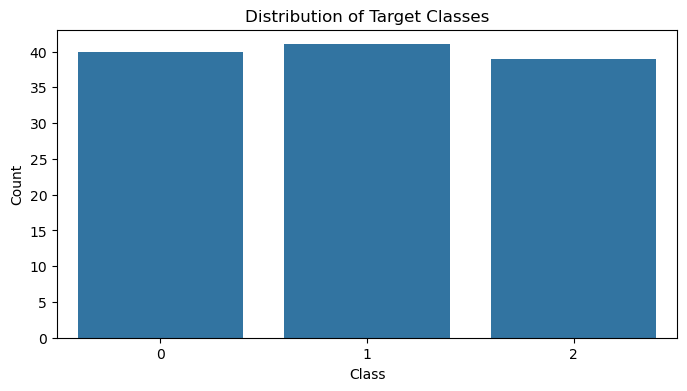

In [27]:
# Create a figure with specified dimensions (8x4)
plt.figure(figsize=(8, 4))

# Generate a countplot to display the distribution of target classes (y_train)
sns.countplot(x=y_train)

# Set the title, x-axis label, and y-axis label for the plot
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()


## Model Training and Evaluation
Now we will train the CatBoost model on the training set and then evaluate the model in terms of accuracy score and classification report.

In [30]:
# Create and train the CatBoostClassifier
model = CatBoostClassifier(
    iterations=100, depth=6, learning_rate=0.1,
   loss_function='MultiClass', verbose=False)
model.fit(X_train, y_train)


This program builds and trains a CatBoostClassifier using a set of predetermined hyperparameters, including 100 iterations, a tree depth of 6, a learning rate of 0.1, and a MultiClass loss function. In order to train the model for multiclass classification, the X_train and y_train datasets are used, with verbose output being suppressed (verbose=False).

iterations: This parameter is used to specify the number of boosting iterations which corresponds to the number of decision trees to be built. It controls the complexity of the model.
depth: It defines the depth of each decision tree in the ensemble. A higher depth allows the model to capture more complex relationships present in the data. But it may lead to overfitting if it is set too high.
learning_rate: The learning rate determines the step size for gradient descent during model training. A smaller learning rate can help prevent overfitting but may require more iterations to converge.
loss_function: For multiclass classification, we will use the 'MultiClass' loss function. This is specifically designed for handling multiple classes. It computes the loss for each class separately and aggregates them finally.
verbose: This parameter controls whether to print training progress in runtime console during model training or not. Setting it to 'False' suppresses the progress output and keeps the console clean.

## Prediction and Evaluation

In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Printing metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



For model evaluation we will consider some well-known metrics which are discussed below:

Accuracy score: this metric measures the fraction of correctly predicted instances out of all instances in the test set. This provides an overall assessment of the model's performance.

Classification Report: The classification report provides a detailed metrics for each class which includes precision, recall, F1-score(harmonic mean of precision and recall) and support. It helps assess the model's performance on a per-class basis which can be important in imbalanced datasets or when different classes have their individual significance.

From the output we can see that our CatBoost model has achieved 100% accuracy on Iris Dataset and also other metrics like precision and recall are also 1. So, this model can effectively classify all three species(setosa, versicolor and virginica) of Iris flowers present in the dataset. So, this model can be used for deployment.

## Model Deployment
### Model saving to runtime
Now, we will save the trained model to use it in our user interface.

In [40]:
# Save the trained model
joblib.dump(model, 'catboost_model.pkl')


['catboost_model.pkl']

The trained CatBoost model (model) is saved by this code using joblib.dump to a file named 'catboost_model.pkl', making it simple to load and use for future predictions or other tasks. This output ensures that the trained model is successfully saved in you runtime. Now we will be able to load it for our user interface.

The Python function joblib.dump is mostly used for quickly saving Python objects, such as machine learning models, to disk. It is frequently used as a substitute for Python's built-in pickle module since it is tuned for effectively storing big NumPy arrays. It is especially helpful for machine learning models, which can be intricate and memory-intensive.

## User interface creation
Now, let's create a user interface where user can give inputs Sepal Length, Sepal Width, Petal Length and Petal Width and the model predict the type of Iris flower based on that input.

In [58]:
import joblib
import numpy as np
import gradio as gr

# Load the trained model
model = joblib.load('catboost_model.pkl')

# Define prediction function
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    inputs = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    probabilities = model.predict_proba(inputs)
    class_names = ["setosa", "versicolor", "virginica"]
    predicted_class = class_names[np.argmax(probabilities)]
    return f"Predicted Iris Species: {predicted_class}"

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_iris,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Iris Flower Classification",
    description="Enter flower measurements to predict the species."
)

# Launch the Gradio interface
iface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
